In [12]:
import numpy as np
import csv
import os
import statistics as stat
import matplotlib.pyplot as plt
from scipy.stats import norm
import random
import pandas as pd

In [25]:
#************ READ-ME *************#

# Ce code est hautement personnalisé en fonction des objectifs du créateur. 
# Cela signifie qu'il n'est pas exécutable par n'importe quel utilisateur, 
# mais qu'il nécessite une certaine manipulation et de nombreuses modifications.

In [13]:
def read_csv(file_path):
    li = []
    with open(file_path, 'r', newline='') as file_csv:
        next(file_csv)
        lettore_csv = csv.reader(file_csv)
        for riga in lettore_csv:
            li.append(riga)
    return li

In [14]:
### CHARGEMENT DES DONNÉES ###
#insérer ici le lien vers le fichier désiré
path = "/Users/ema/Desktop/BACHELOR/Projet Bsc/StSulpice/Facets/Scanline_final/Facets_20deg_bigsurfonly.csv"

data = read_csv(path)

In [15]:
### FONCTIONS ### Misc

def slope_histogram(slopes):
    """
    Crée un histogramme des pentes des discontinuités.

    Cette fonction prend une liste de pentes (en degrés) en entrée
    et génère un histogramme qui représente la fréquence des pentes
    pour chaque intervalle de dix degrés.

    Paramètres:
    slopes (list): Liste des pentes (en degrés) des discontinuités.

    Affiche:
    Un histogramme montrant la distribution des pentes dans des
    intervalles de dix degrés. Les pentes sont affichées sur l'axe
    des x et les fréquences sur l'axe des y.

    Remarque:
    Cette fonction utilise la bibliothèque Matplotlib pour créer
    et afficher l'histogramme.

    Exemple d'utilisation:
    slopes = [15, 23, 35, 42, ...]
    slope_histogram(slopes)
    """

    # Création d'un dictionnaire pour compter les éléments de chaque classe (chaque 10°)
    counts = {i: 0 for i in range(0, 100, 10)}

    # Compte les pendages dans chaque classe
    for slope in slopes:
        ten_degree_range = int(slope / 10) * 10
        counts[ten_degree_range] += 1

    # Sépare les données (x et y)
    ten_degree_ranges = list(counts.keys())
    frequencies = list(counts.values())

    # Création de l'histogramme
    plt.bar(ten_degree_ranges, frequencies, width=8, align='edge', edgecolor='black', color='skyblue')

    # Personalisation de l'histogramme
    plt.xlabel('Pendage [°]')
    plt.ylabel('Fréquence')
    plt.title('Fréquence des pendages des discontinuités')
    plt.xticks(range(0, 100, 10))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig("/Users/ema/Desktop/BACHELOR/Projet Bsc/StSulpice/python/Images/hist_pendages.png")

    plt.show()
    
    
def analyze_areas(areas):
    """
    Analyse les aires des discontinuités et génère un histogramme.

    Cette fonction prend une liste de surfaces (en mètres carrés) en entrée,
    et elle effectue diverses analyses statistiques. Elle génère aussi 
    un histogramme représentant la fréquence des aires dans différentes
    classes prédéfinies.

    Paramètres:
    areas (list): Liste des superficies (en mètres carrés) des discontinuités.

    Affiche:
    - Nombre total de surfaces planaires.
    - Superficie maximale et minimale.
    - Superficie moyenne et déviation standard.
    - Histogramme montrant la distribution des superficies dans différentes classes.

    Remarque:
    Cette fonction utilise la bibliothèque NumPy et Matplotlib pour effectuer
    les analyses statistiques et générer l'histogramme.

    Exemple d'utilisation:
    areas = [50.2, 75.8, 110.5, ...]
    analyze_areas(areas)
    """
    
    if not areas:
        return
    
    max_area = max(areas)
    min_area = min(areas)
    num_classes = 10

    class_ranges = np.linspace(min_area, max_area, num_classes + 1)
    class_frequencies = np.histogram(areas, bins=class_ranges)[0]
    
    print("Nombre de surfaces planaires:", len(areas))
    print("Surface maximale:", max_area, "m2")
    print("Surface minimale:", min_area, "m2")
    print("Surface moyenne:", round(stat.mean(areas), 3), "m2")
    print("Déviation standard:", round(stat.stdev(areas), 3), "m2")

    print("\nFréquence des classes:")
    for i, freq in enumerate(class_frequencies):
        range_str = f"{class_ranges[i]:.2f} - {class_ranges[i+1]:.2f}"
        print(f"Classe {i+1}: {range_str}: {freq}")

    plt.bar(range(num_classes), class_frequencies)
    plt.xlabel("Aire [m2]")
    plt.ylabel("Fréquence")
    plt.title("Histogramme des aires des discontinuités")
    plt.xticks(range(num_classes), [f"{class_ranges[i]:.2f}-{class_ranges[i+1]:.2f}" for i in range(num_classes)], rotation=45)
    plt.show()
    

def surface_filter(file_path, surf):
    """
    Filtre un fichier CSV en fonction de la superficie minimale.

    Cette fonction prend en entrée le chemin d'accès à un fichier CSV et
    une valeur de superficie minimale. Elle crée une copie du fichier
    original, filtre les lignes en fonction de la superficie minimale
    spécifiée, et enregistre les lignes filtrées dans le nouveau fichier.

    Paramètres:
    file_path (str): Chemin d'accès au fichier CSV à filtrer.
    surf (float): Superficie minimale requise pour conserver une ligne.

    Remarque:
    - Si le fichier spécifié n'existe pas, un message d'erreur sera affiché.
    - Les fichiers CSV sont supposés avoir une ligne d'en-tête.

    Exemple d'utilisation:
    file_path = "donnees.csv"
    superficie_minimale = 100.0
    surface_filter(file_path, superficie_minimale)
    """
    
    if not os.path.exists(file_path):
        print("Le fichier spécifié n'existe pas.")
        return

    # Création du nouveau nom de fichier dupliqué
    dir_name, file_name = os.path.split(file_path)
    base_name, ext = os.path.splitext(file_name)
    new_file_name = f"{base_name}_bigsurfonly{ext}"
    new_file_path = os.path.join(dir_name, new_file_name)

    # Dupliquer le fichier original
    with open(file_path, 'r', newline='') as original_file:
        with open(new_file_path, 'w', newline='') as new_file:
            new_file.write(original_file.read())

    # Filtrer le fichier dupliqué
    rows_to_keep = []
    with open(new_file_path, 'r', newline='') as csv_file:
        csv_reader = csv.reader(csv_file)
        rows_to_keep.append(next(csv_reader))  # En-tête

        for row in csv_reader:
            if float(row[11]) >= surf:
                rows_to_keep.append(row)
            
    # Écrire les lignes filtrées dans le fichier dupliqué
    with open(new_file_path, 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerows(rows_to_keep)
        

def generate_standard_distribution(mean, stdev, size):
    return np.random.normal(loc=mean, scale=stdev, size=size)

def find_q68(data):
    return np.percentile(data, 68)

def plot_distribution_with_q68(data, q68_value, mean, stdev, name, save_path=None):
    """
    Crée un graphique d'histogramme avec distribution normale et valeur Q68%.

    Cette fonction prend en entrée un ensemble de données, la valeur Q68%,
    la moyenne et l'écart-type, ainsi qu'un nom descriptif pour le graphique.
    Elle génère un histogramme des données, superpose la distribution normale
    calculée à partir de la moyenne et de l'écart-type fournis, et ajoute une ligne
    verticale pour la valeur Q68%.

    Paramètres:
    data (array-like): Les données à représenter dans l'histogramme.
    q68_value (float): La valeur Q68% à représenter avec une ligne verticale.
    mean (float): La moyenne des données.
    stdev (float): L'écart-type des données.
    name (str): Le nom descriptif pour le graphique.
    save_path (str, optionnel): Le chemin pour enregistrer l'image. Si non fourni, l'image sera affichée.

    Affiche:
    Un graphique représentant l'histogramme des données, la distribution normale
    calculée à partir de la moyenne et de l'écart-type, ainsi qu'une ligne verticale pour la valeur Q68%.

    Remarque:
    - Le graphique inclut une légende, des étiquettes d'axe et une grille de fond.
    - L'option d'enregistrement de l'image est actuellement commentée dans le code.

    Exemple d'utilisation:
    data = [2.5, 3.1, 4.8, ...]
    q68_value = 3.9
    mean = 4.0
    stdev = 0.6
    name = "Répartition des données"
    plot_distribution_with_q68(data, q68_value, mean, stdev, name, save_path="graphique_donnees.png")
    """
    
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')
    plt.axvline(q68_value, color='red', linestyle='--', linewidth=2, label=f'Q68% = {q68_value:.4f}')

    # Créations de la distribution normale
    x = np.linspace(min(data), max(data), 1000)
    y = norm.pdf(x, loc=mean, scale=stdev)
    plt.plot(x, y, color='green', linewidth=2, label='Distribution normale')

    plt.xlabel('Distance [m]')
    plt.ylabel('Fréquence')
    plt.title(f'{name}')
    plt.legend()
    plt.grid(True)
    #if save_path:
        #save_path = save_path+name
        #plt.savefig(save_path, dpi=300, bbox_inches='tight')
        #print(f"Immagine salvata con successo in: {save_path}")
    #else:
        #plt.show()

    plt.show()

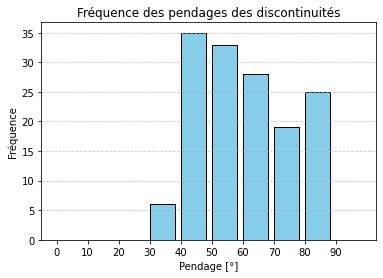

0


In [16]:
# Filtration des plans par surface: A > 0.2 m2

#surface_filter("/Users/ema/Desktop/BACHELOR/Projet Bsc/StSulpice/Facets/Scanline_final/DIPSdata.csv", 0.2)

with open("/Users/ema/Desktop/BACHELOR/Projet Bsc/StSulpice/Facets/Scanline_final/DIPSdata.csv", 'r', newline='') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)
    li_dip = [float(row[13]) for row in csv_reader]
    li_surf = [float(row[11]) for row in csv_reader]

    
    
#**************** ANALYSE DES DISCONTINUITÉES ***************
# Orientations
dipdir = [int(row[12]) for row in data]
#plt.hist(dipdir, density=True)
n = np.linspace(0, 90)
dip = [int(row[13]) for row in data]
slope_histogram(li_dip)
#plt.hist(dip, bins=10)

#Surface
all_surfaces = [float(row[11]) for row in data]

#*******************************************
analyze_areas(li_surf)
print(len(li_surf))

In [17]:
## VALEURS POUR LA DETERMINATION DU PARAMETRE MAX DISTANCE (points-plane)

# Face 1
nameF1 = 'Face 1'
meanF1 = 0.0082765
stdevF1 = 0.00562616
sizeF1 = 231918

# Face 2
nameF2 = 'Face 2'
meanF2 = 0.00950377
stdevF2 = 0.0107486
sizeF2 = 3361

# Face 3
nameF3 = 'Face 3'
meanF3 = 0.0118761
stdevF3 = 0.00851842
sizeF3 = 18573

# Face 4
nameF4 = 'Face 4'
meanF4 = 0.0234054
stdevF4 = 0.0168843
sizeF4 = 12148

# Face 5
nameF5 = 'Face 5'
meanF5 =0.0156278
stdevF5 = 0.0110298
sizeF5 = 9988

# Face 6
nameF6 = 'Face 6'
meanF6 = 0.0122302
stdevF6 = 0.011517
sizeF6 = 4167


Valore corrispondente al Q68%: 0.010926471296307957


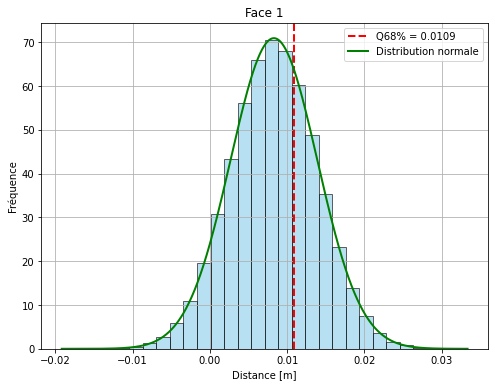

Q68%: 0.014741997859133318


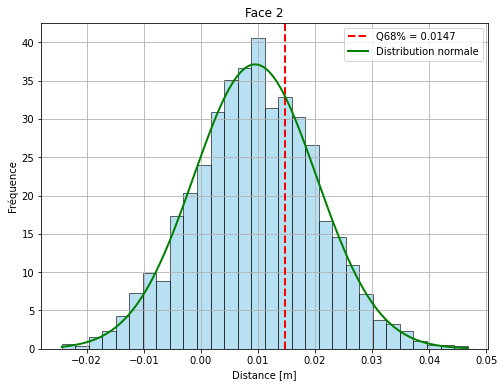

Q68%: 0.015827868464840366


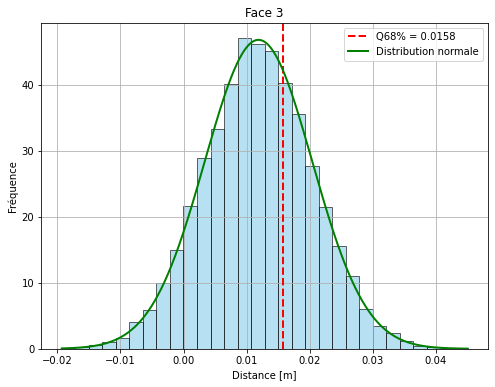

Q68%: 0.03139141503059307


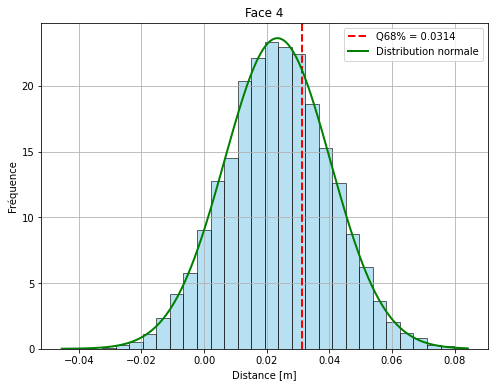

Q68%: 0.020810769445045212


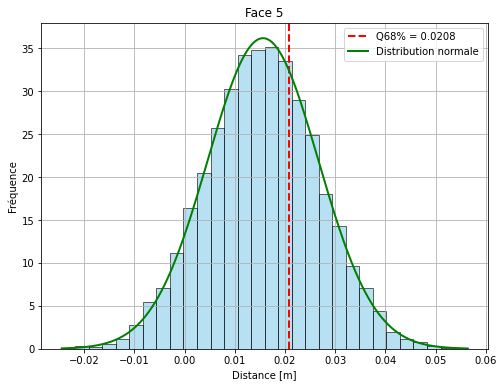

Q68%: 0.017817310570720023


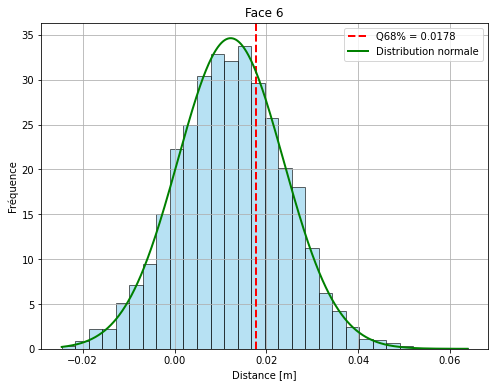

In [18]:
### SAVE PATH FOR IMAGES
savepath = '/Users/ema/Desktop/BACHELOR/Projet Bsc/StSulpice/python/'


# GENERATION DE LA DISTRUBUTION NORMALE POUR ESTIMER LE Q68%

#Face 1 
distributionF1 = generate_standard_distribution(meanF1, stdevF1, sizeF1)
q68_F1 = find_q68(distributionF1)
print(f"Valore corrispondente al Q68%: {q68_F1}")
# Dessine le graphique avec la distribution normale et le Q68
plot_distribution_with_q68(distributionF1, q68_F1, meanF1, stdevF1, nameF1, savepath)

#Face 2
distributionF2 = generate_standard_distribution(meanF2, stdevF2, sizeF2)
q68_F2 = find_q68(distributionF2)
print(f"Q68%: {q68_F2}")
plot_distribution_with_q68(distributionF2, q68_F2, meanF2, stdevF2, nameF2, savepath)

#Face 3
distributionF3 = generate_standard_distribution(meanF3, stdevF3, sizeF3)
q68_F3 = find_q68(distributionF3)
print(f"Q68%: {q68_F3}")
plot_distribution_with_q68(distributionF3, q68_F3, meanF3, stdevF3, nameF3, savepath)

#Face 4
distributionF4 = generate_standard_distribution(meanF4, stdevF4, sizeF4)
q68_F4 = find_q68(distributionF4)
print(f"Q68%: {q68_F4}")
plot_distribution_with_q68(distributionF4, q68_F4, meanF4, stdevF4, nameF4, savepath)

#Face 5
distributionF5 = generate_standard_distribution(meanF5, stdevF5, sizeF5)
q68_F5 = find_q68(distributionF5)
print(f"Q68%: {q68_F5}")
plot_distribution_with_q68(distributionF5, q68_F5, meanF5, stdevF5, nameF5, savepath)

#Face 6
distributionF6 = generate_standard_distribution(meanF6, stdevF6, sizeF6)
q68_F6 = find_q68(distributionF6)
print(f"Q68%: {q68_F6}")
plot_distribution_with_q68(distributionF6, q68_F6, meanF6, stdevF6, nameF6, savepath)



In [19]:
# CREATIONS DES OBJETS (Points, Planes, Vectors)

class Point():
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

    def __str__(self):
        return f"X: {self.x}  Y: {self.y}  Z:{self.z}"
    
    def move(self, dist):
        self.x += dist
        self.y += dist
        self.z += dist
        return self

class Vector():
    
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    
    def __str__(self):
        return f"X: {self.x}, Y: {self.y}, Z: {self.z}"

class Plane():

    def __init__(self, center: Point, normal: Vector):
        self.center = center
        self.normal = normal
        #self.d = - normal.x * center.x - normal.y * center.y - normal.z * center.z
        # d è la distanza del piano dall'origine

    def __str__(self):
        return f"Normal X: {self.normal.x}, Normal Y: {self.normal.y}, Normal Z: {self.normal.z}\nCenter X: {self.center.x}, Center Y: {self.center.y}, Center Z: {self.center.z}"

    def relative_distance(self, other):
        # Distanza tra due piani paralleli: |d1 - d2| / sqrt(a^2+b^2+c^2) 
        d = abs(self.d - other.d) 
        return d
    
    def translate(self, dist):
        self.center.move(dist)
        self.d += dist
        return self



def calculate_distances(data:list, normal:Vector):
    """
    Calcule la distance entre des plans de la même famille. Les plans sont construit en utilisant
    les coordonnées fourni dans file et la normale en entrée.
    
    Args:
        data (list): une liste contenant les plans ainsi que leur distance à l'origine.
        normal (Vector): le vecteur normal au plan.
        
    Returns:
        li_dist (list) : une liste contenant toutes les distances entre plans consécutifs.
    """
        
    li = []
    for plane in data:
        new_plane = []
        center = Point(float(plane[1]), float(plane[2]), float(plane[3]))
        obj = Plane(center, normal1)
        new_plane.append(obj)
        d = dist_from_origin(obj)
        new_plane.append(d)
        li.append(new_plane)

    sorted_data = sorted(li, key=get_last_element)
    
    li_dist = []
    for i in range(1, len(sorted_data)):
        dist = sorted_data[i][1] - sorted_data[i-1][1]
        li_dist.append(dist)
        #print(dist)
    
    return li_dist
        

def dd_d_to_normal(dd, d):
    """
    Trouve la direction et le plongement (Dip direction/dip) de la normale propre au plan entré.
    
    Args:
        dd (int): Dip direction (angle de direction) en degrées.
        d (int) : Dip (plongement) en degrées.
        
    Returns:
        normal_dd_d : un tuple representant la normale du plan en DD/D.
    """
    if dd < 180:
        dd += 180
    else:
        dd -= 180
        
    d = 90 - d
    normal_dd_d = (dd,d)
    
    return normal_dd_d
    
    
def dd_d_to_cartesian(tup):
    """
    Convertit des angles de direction et d'inclinaison (Dip direction, Dip) en coordonnées cartésiennes.

    Args:
        tup: un tuple contenant la direction et le plongement d'un vecteur en (Dip direction, dip).

    Returns:
        Vecteur: Un vecteur représentant la normale du plan en coordonnées x, y, z.
    """
    dd = tup[0]
    d = tup[1]
    
    x = np.cos(np.radians(dd)) * np.cos(np.radians(d))
    y = np.sin(np.radians(dd)) * np.cos(np.radians(d))
    z = np.sin(np.radians(d))
    
    normal = Vector(x,y,z)
    print(normal)
    
    return normal


def split_sets(file_path):
    """
    Divise les lignes du fichier CSV en fonction du champ 'Set'.
    
    Args:
        file_path (str): Le chemin du fichier CSV.
        
    Returns:
        list: Un dictionnaire représentant les familles en fonction de la valeur du champ 'Set'.
    """
    families = {'1': [], '2': [], '3': [], '4': []}

    with open(file_path, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            set_value = row.get('Set')
            if set_value in families.keys():
                families[set_value].append(list(row.values()))

    families_li = [family for family in families.values() if family]

    return families

def dist_from_origin(plane: Plane):
    """
    Calcule la distance plan-origine. 
    
    Args:
        center (Point) : un point sur le plan.
        normal (Vector) : le vecteur normal décrivant le plan.
    
    Returns:
        d : la distance plan-origine.
    """
    return - plane.normal.x * plane.center.x - plane.normal.y * plane.center.y - plane.normal.z * plane.center.z

def get_last_element(item):
    return item[-1]

def show_hist(li:list, name, save_path=None):
    mean = np.mean(li)
    stdev = np.std(li)
    plt.hist(li, alpha=0.6, color='skyblue', edgecolor='black')
    plt.locator_params(axis='y', integer=True)
    plt.axvline(mean, color='blue', linestyle='--', linewidth=2, label=f'mean = {mean:.2f} m')
    plt.xlabel("Espacement [m]")
    plt.ylabel("Fréquence")
    plt.title(f"Fréquences d'espacement entre les discontinuités du set {name}")
    plt.legend()
    if save_path:
        save_path = save_path + 'hist_dist_set_'+ name
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Immagine salvata con successo in: {save_path}")
        plt.show()
    else:
        plt.show()
                    
def calculate_frequencies(number_list):
    """
    Calcule les fréquences des nombres dans une liste donnée.

    Cette fonction prend en entrée une liste de nombres à virgule flottante et
    renvoie un dictionnaire où les clés sont les nombres et les valeurs sont les
    fréquences correspondantes de ces nombres dans la liste d'entrée.

    Args:
        number_list (list): Une liste de nombres à virgule flottante.

    Returns:
        dict: Un dictionnaire contenant les nombres en tant que clés et leurs
              fréquences en tant que valeurs.
    """

    frequencies = {}
    
    for number in number_list:
        number = round(number, 1)
        if number in frequencies:
            frequencies[number] += 1
        else:
            frequencies[number] = 1
    
    return frequencies

X: -0.5916891144555523, Y: 0.7051476278512913, Z: 0.39073112848927377
Immagine salvata con successo in: /Users/ema/Desktop/BACHELOR/Projet Bsc/StSulpice/python/Images/hist_dist_set_1


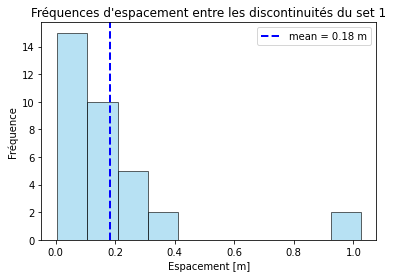

============ SET 1 ============
Number of planes : 34
Dip direction / Dip : 310/67
Mean spacing : 0.18 ± 0.23 m
Median spacing : 0.13 m
X: 0.4689786299448621, Y: -0.6952894118228324, Z: 0.5446390350150271
Immagine salvata con successo in: /Users/ema/Desktop/BACHELOR/Projet Bsc/StSulpice/python/Images/hist_dist_set_2


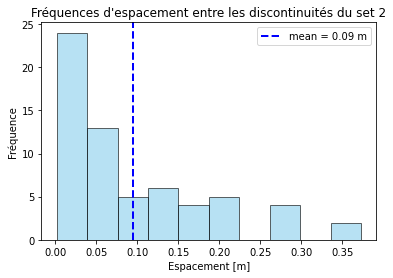

============ SET 2 ============
Number of planes : 63
Dip direction / Dip : 124/57
Mean spacing : 0.09 ± 0.09 m
Median spacing : 0.06 m
X: 0.902298197117246, Y: -0.1429099949562534, Z: 0.4067366430758002
Immagine salvata con successo in: /Users/ema/Desktop/BACHELOR/Projet Bsc/StSulpice/python/Images/hist_dist_set_3


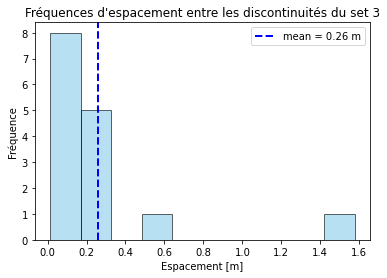

========== SET 3 ==========
Number of planes : 15
Dip direction / Dip : 171/66
Mean spacing : 0.26 ± 0.38 m
Median spacing : 0.13 m
X: -0.7193398003386511, Y: -0.6946583704589974, Z: 0.0
Immagine salvata con successo in: /Users/ema/Desktop/BACHELOR/Projet Bsc/StSulpice/python/Images/hist_dist_set_4


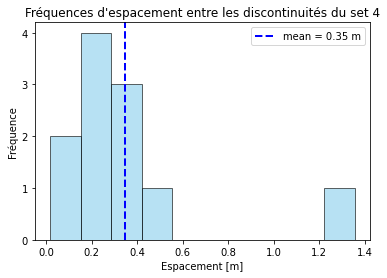

========== SET 4 ==========
Number of planes : 11
Dip direction / Dip : 44/90
Mean spacing : 0.35 ± 0.35 m
Median spacing : 0.2 m


In [20]:
# CALCUL DES DISTANCES ENTRE DIACLASES DE LA MÊME FAMILLE

#La position du fichier csv
file_path = "/Users/ema/Desktop/BACHELOR/Projet Bsc/StSulpice/Facets/Scanline_final/DIPSdata.csv"
save_path = "/Users/ema/Desktop/BACHELOR/Projet Bsc/StSulpice/python/Images/"

#chargement des données et subdivision des plans par famille dans un dictionnaire
sets = split_sets(file_path)

# Set 1
set1 = sets['1']
dd1 = 310
d1 = 67
normal1 = dd_d_to_cartesian(dd_d_to_normal(dd1, d1))
dist1 = calculate_distances(set1, normal1)
show_hist(dist1, '1', save_path)
moy1 = np.mean(dist1)
stdev1 = np.std(dist1)
print(f"{'='*12} SET 1 {'='*12}")
print(f"Number of planes : {len(dist1)}")
print(f"Dip direction / Dip : {dd1}/{d1}")
print(f"Mean spacing : {round(moy1,2)} ± {round(stdev1,2)} m")
print(f"Median spacing : {round(np.median(dist1),2)} m")
      

# Set 2
set2 = sets['2']
dd2 = 124
d2 = 57
normal2 = dd_d_to_cartesian(dd_d_to_normal(dd2, d2))
dist2 = calculate_distances(set2, normal2)
show_hist(dist2, '2', save_path)
moy2 = np.mean(dist2)
stdev2 = np.std(dist2)
print(f"{'='*12} SET 2 {'='*12}")
print(f"Number of planes : {len(dist2)}")
print(f"Dip direction / Dip : {dd2}/{d2}")
print(f"Mean spacing : {round(moy2,2)} ± {round(stdev2,2)} m")
print(f"Median spacing : {round(np.median(dist2),2)} m")      


# Set 3
set3 = sets['3']
dd3 = 171
d3 = 66
normal3 = dd_d_to_cartesian(dd_d_to_normal(dd3, d3))
dist3 = calculate_distances(set3, normal3)
show_hist(dist3, '3', save_path)
moy3 = np.mean(dist3)
stdev3 = np.std(dist3)
print(f"{'='*10} SET 3 {'='*10}")
print(f"Number of planes : {len(dist3)}")
print(f"Dip direction / Dip : {dd3}/{d3}")
print(f"Mean spacing : {round(moy3,2)} ± {round(stdev3,2)} m")
print(f"Median spacing : {round(np.median(dist3),2)} m")


# Set 4
set4 = sets['4']
dd4 = 44
d4 = 90
normal4 = dd_d_to_cartesian(dd_d_to_normal(dd4, d4))
dist4 = calculate_distances(set4, normal4)
show_hist(dist4, '4', save_path)
moy4 = np.mean(dist4)
stdev4 = np.std(dist4)
print(f"{'='*10} SET 4 {'='*10}")
print(f"Number of planes : {len(dist4)}")
print(f"Dip direction / Dip : {dd4}/{d4}")
print(f"Mean spacing : {round(moy4,2)} ± {round(stdev4,2)} m")
print(f"Median spacing : {round(np.median(dist4),2)} m")

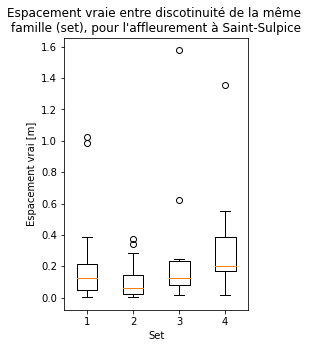

In [21]:
# BOXPLOT POUR L'ESPACEMENT VRAI

plt.figure(figsize=(3.3,5))
plt.boxplot([dist1, dist2, dist3, dist4], vert=True, bootstrap=10000)
plt.title("Espacement vraie entre discotinuité de la même \nfamille (set), pour l'affleurement à Saint-Sulpice")
plt.xlabel("Set")
plt.ylabel("Espacement vrai [m]")
plt.show()


============ SET 1 ============
Number of planes : 34
Mean roughness : 22.01 ± 8.6 mm
Median roughness : 20.36 mm

============ SET 2 ============
Number of planes : 34
Mean roughness : 26.05 ± 6.94 mm
Median roughness : 25.61 mm

============ SET 3 ============
Number of planes : 34
Mean roughness : 23.92 ± 7.0 mm
Median roughness : 21.69 mm

============ SET 4 ============
Number of planes : 34
Mean roughness : 21.98 ± 3.8 mm
Median roughness : 21.8 mm



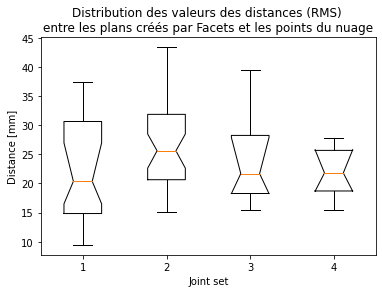

In [22]:
# RUGOSITÉ DES FRACTURES

results = {}
results['1'] = []
results['2'] = []
results['3'] = []
results['4'] = []
#print(sets)
for key in sets:
    li_planes = sets[key]
    for plane in li_planes:
        results[key].append(float(plane[7]) * 1000) 

li_rms = []
for key in results:
    li_rms.append(results[key])
    mean = np.mean(results[key])
    median = np.median(results[key])
    stdev = np.std(results[key])
    print(f"{'='*12} SET {key} {'='*12}")
    print(f"Number of planes : {len(dist1)}")
    print(f"Mean roughness : {round(mean,2)} ± {round(stdev,2)} mm")
    print(f"Median roughness : {round(median,2)} mm")
    print()
plt.boxplot(li_rms, notch=True, bootstrap=1000)
plt.ylabel(f'Distance [mm]')
plt.title(f'Distribution des valeurs des distances (RMS) \nentre les plans créés par Facets et les points du nuage')
plt.xlabel('Joint set')
plt.savefig(save_path+'RMS_boxplot', dpi=300, bbox_inches='tight')
plt.show()

============ SET 1 ============
Number of planes : 35
Mean surface : 1.28 ± 2.24 m2
Median surface : 0.54 m2

============ SET 2 ============
Number of planes : 64
Mean surface : 0.59 ± 0.51 m2
Median surface : 0.37 m2

============ SET 3 ============
Number of planes : 16
Mean surface : 0.37 ± 0.2 m2
Median surface : 0.29 m2

============ SET 4 ============
Number of planes : 12
Mean surface : 0.46 ± 0.34 m2
Median surface : 0.36 m2



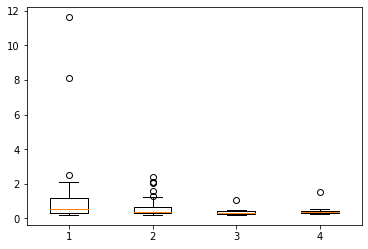

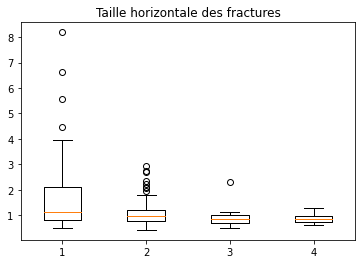

============ SET 1 ============
Number of planes : 35
Mean horizontal extension : 1.91 ± 1.78 m2
Median horizontal extension : 1.14 m2

============ SET 2 ============
Number of planes : 64
Mean horizontal extension : 1.15 ± 0.56 m2
Median horizontal extension : 0.98 m2

============ SET 3 ============
Number of planes : 16
Mean horizontal extension : 0.9 ± 0.4 m2
Median horizontal extension : 0.83 m2

============ SET 4 ============
Number of planes : 12
Mean horizontal extension : 0.88 ± 0.19 m2
Median horizontal extension : 0.86 m2



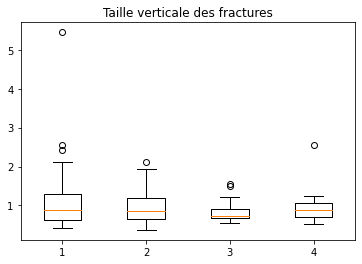

============ SET 1 ============
Number of planes : 35
Mean vertical extension : 1.16 ± 0.91 m2
Median vertical extension : 0.87 m2

============ SET 2 ============
Number of planes : 64
Mean vertical extension : 0.96 ± 0.4 m2
Median vertical extension : 0.85 m2

============ SET 3 ============
Number of planes : 16
Mean vertical extension : 0.86 ± 0.3 m2
Median vertical extension : 0.73 m2

============ SET 4 ============
Number of planes : 12
Mean vertical extension : 1.0 ± 0.53 m2
Median vertical extension : 0.87 m2



In [27]:
# SHAPE
# Ici on fait une statistique sur la grandeur et l'aire des fractures

# ************* aire **************
surfaces= {}
surfaces['1'] = []
surfaces['2'] = []
surfaces['3'] = []
surfaces['4'] = []

for key in sets:
    li_planes = sets[key]
    for plane in li_planes:
        surfaces[key].append(float(plane[11]))
for key in surfaces:
    li_aire = surfaces[key]
    #plt.boxplot(li_aire, bootstrap = 10000)
    #plt.show()
for key in surfaces:
    li_rms.append(surfaces[key])
    mean = np.mean(surfaces[key])
    median = np.median(surfaces[key])
    stdev = np.std(surfaces[key])
    print(f"{'='*12} SET {key} {'='*12}")
    print(f"Number of planes : {len(surfaces[key])}")
    print(f"Mean surface : {round(mean,2)} ± {round(stdev,2)} m2")
    print(f"Median surface : {round(median,2)} m2")
    print() 
plt.boxplot([surfaces['1'], surfaces['2'], surfaces['3'], surfaces['4']])
plt.show()

#************* taille horizontale ********************
horiz= {}
horiz['1'] = []
horiz['2'] = []
horiz['3'] = []
horiz['4'] = []

for key in sets:
    li_planes = sets[key]
    for plane in li_planes:
        horiz[key].append(float(plane[8]))
for key in horiz:
    li_horiz = horiz[key]
plt.boxplot([horiz['1'], horiz['2'], horiz['3'], horiz['4']], bootstrap = 10000)
plt.title('Taille horizontale des fractures')
plt.show()

for key in horiz:
    #li_rms.append(surfaces[key])
    mean = np.mean(horiz[key])
    median = np.median(horiz[key])
    stdev = np.std(horiz[key])
    print(f"{'='*12} SET {key} {'='*12}")
    print(f"Number of planes : {len(surfaces[key])}")
    print(f"Mean horizontal extension : {round(mean,2)} ± {round(stdev,2)} m2")
    print(f"Median horizontal extension : {round(median,2)} m2")
    print() 
    
# ************ taille verticale *********************
vertical = {}
vertical['1'] = []
vertical['2'] = []
vertical['3'] = []
vertical['4'] = []

for key in sets:
    li_planes = sets[key]
    for plane in li_planes:
        vertical[key].append(float(plane[9]))

plt.boxplot([vertical['1'], vertical['2'], vertical['3'], vertical['4']], bootstrap=10000)
plt.title('Taille verticale des fractures')
plt.show()

for key in vertical:
    mean = np.mean(vertical[key])
    median = np.median(vertical[key])
    stdev = np.std(vertical[key])
    print(f"{'='*12} SET {key} {'='*12}")
    print(f"Number of planes : {len(vertical[key])}")
    print(f"Mean vertical extension : {round(mean, 2)} ± {round(stdev, 2)} m2")
    print(f"Median vertical extension : {round(median, 2)} m2")
    print()